In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

读取数据

In [2]:
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [3]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=URL,extract=True)

In [4]:
zip_dir_base = os.path.dirname(zip_dir)

In [5]:
zip_dir_base

'C:\\Users\\A\\.keras\\datasets'

In [6]:
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')


In [7]:
num_cats_tr = len(os.listdir(train_cats_dir))#1000
num_dogs_tr = len(os.listdir(train_dogs_dir))#1000

In [8]:
num_cats_val = len(os.listdir(validation_cats_dir))#500
num_dogs_val = len(os.listdir(validation_dogs_dir))#500

In [9]:
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [10]:
print('train dog nums',num_cats_tr)

train dog nums 1000


参数

In [11]:
BATCH_SIZE = 100
img_shape = 150#150x150

预处理

In [13]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           horizontal_flip=True,
                                          rotation_range=40,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           zoom_range=0.2,
                                           fill_mode='nearest'
                                          )
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [15]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(img_shape,img_shape),
                                                           class_mode='binary'

)

Found 2000 images belonging to 2 classes.


In [16]:
valid_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(img_shape,img_shape),
                                                           class_mode='binary'

)

Found 1000 images belonging to 2 classes.


In [17]:
demo_image = next(train_data_gen)

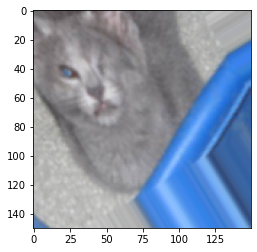

In [18]:
plt.imshow(demo_image[0][0])

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),#
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [46]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#如果是relu loss用sparse_categorical_crossentropy',metrics=['accuracy'])
#如果是sigmoid loss用binary_crossentropy


In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [51]:
EPOCHS = 10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(total_train/BATCH_SIZE),
    epochs=EPOCHS,
    validation_data=valid_data_gen,
    validation_steps=int(total_val/BATCH_SIZE))

Epoch 1/10
20/20 [==============================] - 26s 1s/step - loss: 0.7211 - accuracy: 0.4900 - val_loss: 0.6926 - val_accuracy: 0.5050
Epoch 2/10
20/20 [==============================] - 20s 994ms/step - loss: 0.6940 - accuracy: 0.5200 - val_loss: 0.6903 - val_accuracy: 0.6330
Epoch 3/10
20/20 [==============================] - 21s 1s/step - loss: 0.6862 - accuracy: 0.5530 - val_loss: 0.6630 - val_accuracy: 0.6100
Epoch 4/10
20/20 [==============================] - 20s 1s/step - loss: 0.6677 - accuracy: 0.5805 - val_loss: 0.6396 - val_accuracy: 0.6150
Epoch 5/10
20/20 [==============================] - 20s 1s/step - loss: 0.6513 - accuracy: 0.6015 - val_loss: 0.6549 - val_accuracy: 0.6310
Epoch 6/10
20/20 [==============================] - 20s 995ms/step - loss: 0.6595 - accuracy: 0.6075 - val_loss: 0.6709 - val_accuracy: 0.5840
Epoch 7/10
16/20 [=======================>......] - ETA: 3s - loss: 0.6171 - accuracy: 0.6750

KeyboardInterrupt: 